In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/drug200.csv')

In [9]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
data.shape

(200, 6)

In [ ]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [10]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [24]:
#Converting datatype
x = data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values

from sklearn import preprocessing
sex = preprocessing.LabelEncoder()
sex.fit(['F','M'])
x[:,1] = sex.transform(x[:,1])

BP = preprocessing.LabelEncoder()
BP.fit(['LOW', 'NORMAL', 'HIGH'])
x[:,2] = BP.transform(x[:,2])

chol = preprocessing.LabelEncoder()
chol.fit(['NORMAL', 'HIGH'])
x[:,3] = chol.transform(x[:,3])


In [12]:
y = data.Drug


<ipython-input-14-389b52427130>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap = 'Purples')


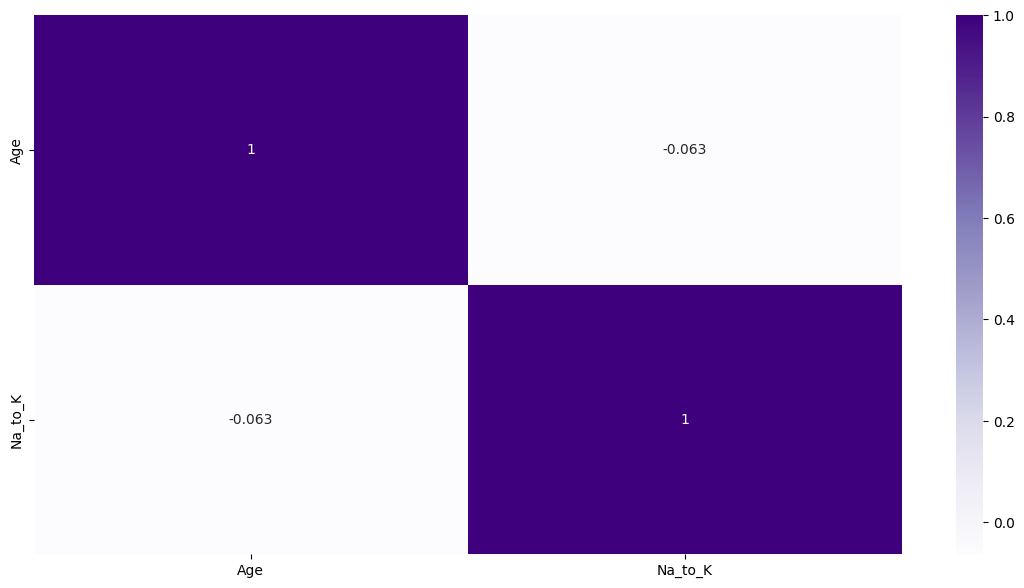

In [14]:
plt.figure(figsize = (14, 7))
sns.heatmap(data.corr(), annot = True, cmap = 'Purples')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [16]:
#create Decision Tree Classifier object
model = DecisionTreeClassifier()

#Train Decision Tree Classifier
model = model.fit(x_train, y_train)

#predict the response for the test dataset
y_pred = model.predict(x_test)

In [17]:
#evaluation using Accuracy score
from sklearn import metrics

#import scikit-learn matrics module for accuracy calculation
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred)*100)

Accuracy:  100.0


In [18]:
#Evaluation using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 4,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0, 13,  0],
       [ 0,  0,  0,  0, 17]])

In [19]:
#Evaluation using classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         4
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        13
       drugY       1.00      1.00      1.00        17

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

